In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Data Overview

The dataset was loaded and the first few rows were displayed to get an initial look at the data structure and its attributes.


In [2]:
# Load the dataset
df = pd.read_csv('02_mushroom_species_data.csv')

# Display the first few rows
print(df.head())

       class cap-shape cap-surface cap-color  bruises     odor  \
0  poisonous    convex      smooth     brown  bruises  pungent   
1     edible    convex      smooth    yellow  bruises   almond   
2     edible      bell      smooth     white  bruises    anise   
3  poisonous    convex       scaly     white  bruises  pungent   
4     edible    convex      smooth      gray       no     none   

  gill-attachment gill-spacing gill-size gill-color  ...  \
0            free        close    narrow      black  ...   
1            free        close     broad      black  ...   
2            free        close     broad      brown  ...   
3            free        close    narrow      brown  ...   
4            free      crowded     broad      black  ...   

  stalk-surface-below-ring stalk-color-above-ring stalk-color-below-ring  \
0                   smooth                  white                  white   
1                   smooth                  white                  white   
2             

## Data Quality Check

Checked the dataset for missing values and reviewed data types and summary statistics. Found that there are 192 missing values in the 'habitat' column. All other columns have no missing values.


In [3]:
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

# Data types and summary statistics
print("\nData types and summary statistics:")
print(df.info())
print(df.describe())

Missing values in each column:
class                         0
cap-shape                     0
cap-surface                   0
cap-color                     0
bruises                       0
odor                          0
gill-attachment               0
gill-spacing                  0
gill-size                     0
gill-color                    0
stalk-shape                   0
stalk-root                    0
stalk-surface-above-ring      0
stalk-surface-below-ring      0
stalk-color-above-ring        0
stalk-color-below-ring        0
veil-type                     0
veil-color                    0
ring-number                   0
ring-type                     0
spore-print-color             0
population                    0
habitat                     192
dtype: int64

Data types and summary statistics:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------            

## Distribution of Mushroom Classes
The bar plot above shows the distribution of mushroom classes in the dataset, differentiating between 'edible' and 'poisonous' mushrooms. The dataset appears to be relatively balanced, with a nearly equal number of examples for each class. This balance is important in a classification task because it ensures that the model has an adequate representation of both classes during training, which helps prevent bias towards either class. As a result, the model can achieve better performance metrics, such as accuracy, precision, recall, and F1-score. Since the classes are balanced, there is no immediate need for data balancing techniques like oversampling or undersampling, which are typically employed when one class significantly outnumbers the other. Additionally, this balanced distribution suggests that the dataset may represent real-world conditions, where both edible and poisonous mushrooms are encountered with similar frequency. This makes the model more practical and reliable for real-world applications.

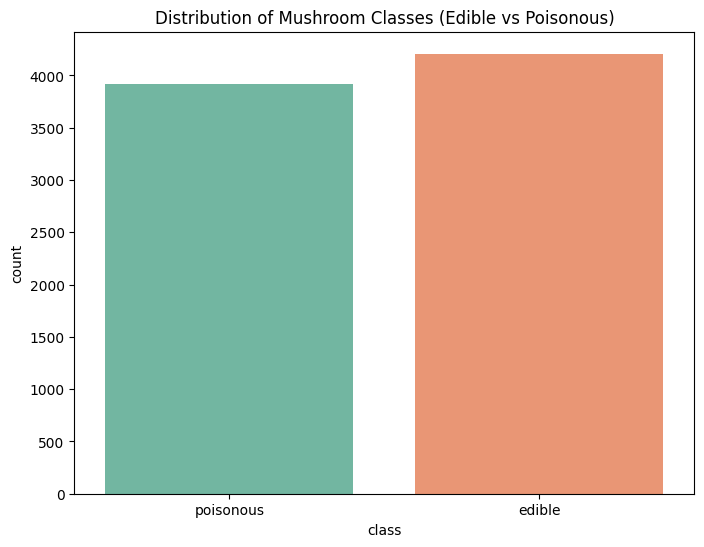

In [4]:
# Distribution of the target variable (class)
plt.figure(figsize=(8, 6))
sns.countplot(x='class', data=df, palette='Set2')
plt.title('Distribution of Mushroom Classes (Edible vs Poisonous)')
plt.show()


The bar plot  illustrates the distribution of different cap shapes among the mushrooms in the dataset. The most common cap shapes are 'convex' and 'flat,' which together account for the majority of the observations. Other shapes, such as 'knobbed,' 'bell,' 'sunken,' and 'conical,' are less frequent. Understanding the distribution of cap shapes is important because it provides insight into the variability of this feature across the dataset. This variability can potentially affect the model's ability to distinguish between edible and poisonous mushrooms based on cap shape alone. Additionally, the prominence of certain cap shapes may suggest that these are more typical or natural among the mushrooms studied, which could be valuable information for identifying species or assessing their edibility.


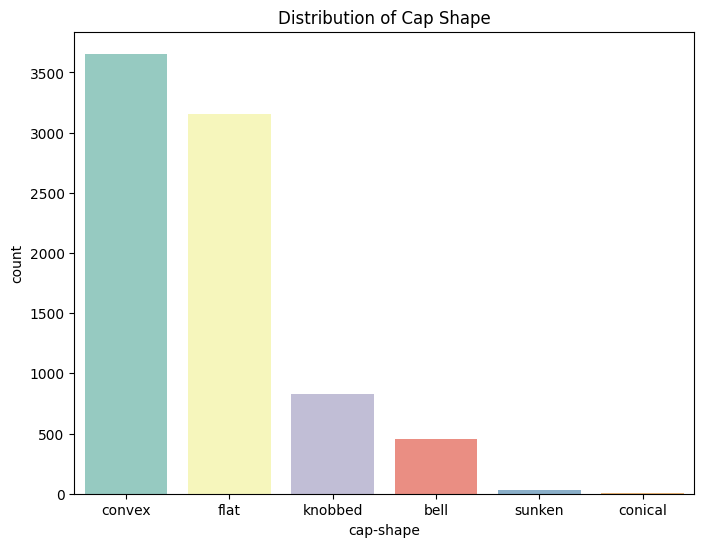

In [5]:
# Distribution of cap shape
plt.figure(figsize=(8, 6))
sns.countplot(x='cap-shape', data=df, palette='Set3', order=df['cap-shape'].value_counts().index)
plt.title('Distribution of Cap Shape')
plt.show()


The bar plot above shows the relationship between cap color and mushroom class (edible vs. poisonous). The colors of the mushroom caps vary significantly, with some colors being more prevalent in edible mushrooms and others more common in poisonous ones. For instance, mushrooms with brown, gray, and red caps appear frequently in both classes, suggesting that cap color alone may not be a definitive feature for distinguishing between edible and poisonous mushrooms. However, certain colors like green, purple, and cinnamon are less common and predominantly associated with one class, indicating that they could be more indicative of a mushroom's edibility or toxicity. This plot highlights the importance of considering multiple features when building a classification model, as relying solely on cap color might not provide sufficient discriminatory power due to the overlap between classes.


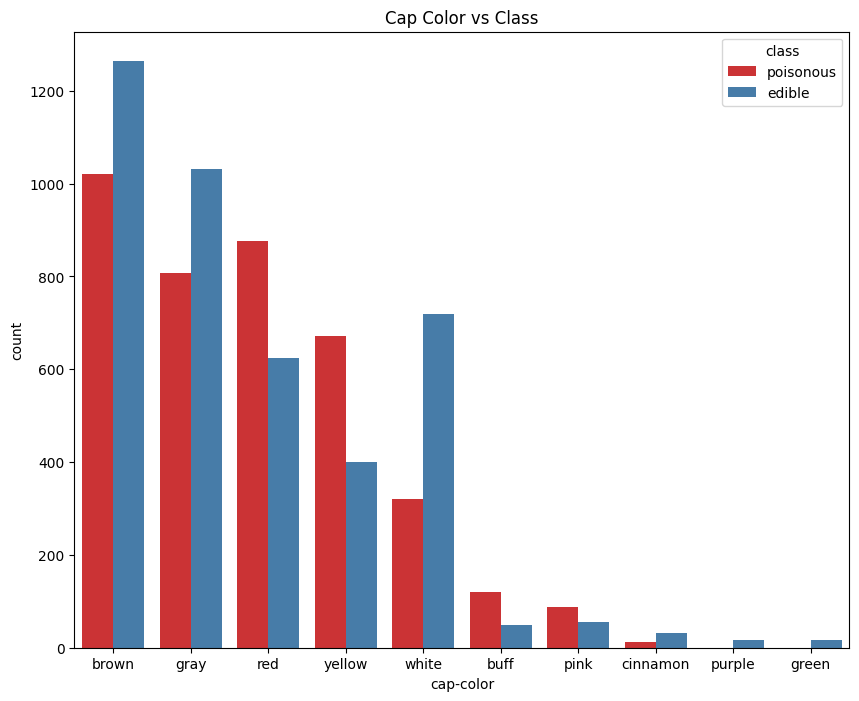

In [6]:
# Relationship between cap-color and class
plt.figure(figsize=(10, 8))
sns.countplot(x='cap-color', hue='class', data=df, palette='Set1', order=df['cap-color'].value_counts().index)
plt.title('Cap Color vs Class')
plt.show()


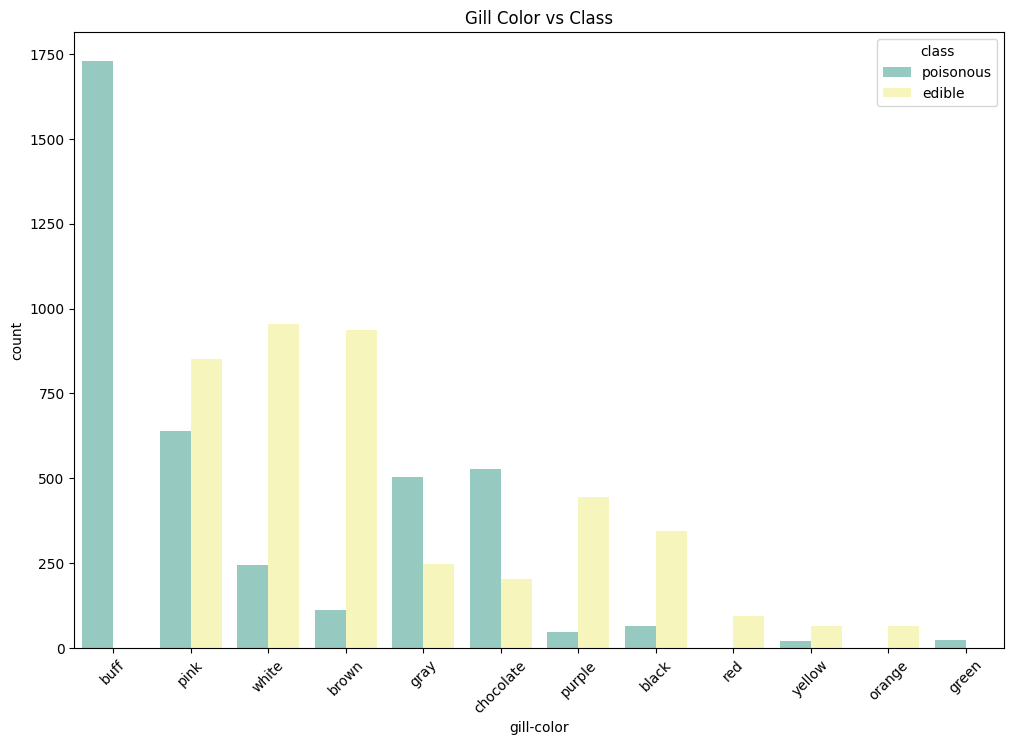

In [7]:
# Analyze interaction between gill-color and class
plt.figure(figsize=(12, 8))
sns.countplot(x='gill-color', hue='class', data=df, palette='Set3', order=df['gill-color'].value_counts().index)
plt.title('Gill Color vs Class')
plt.xticks(rotation=45)
plt.show()

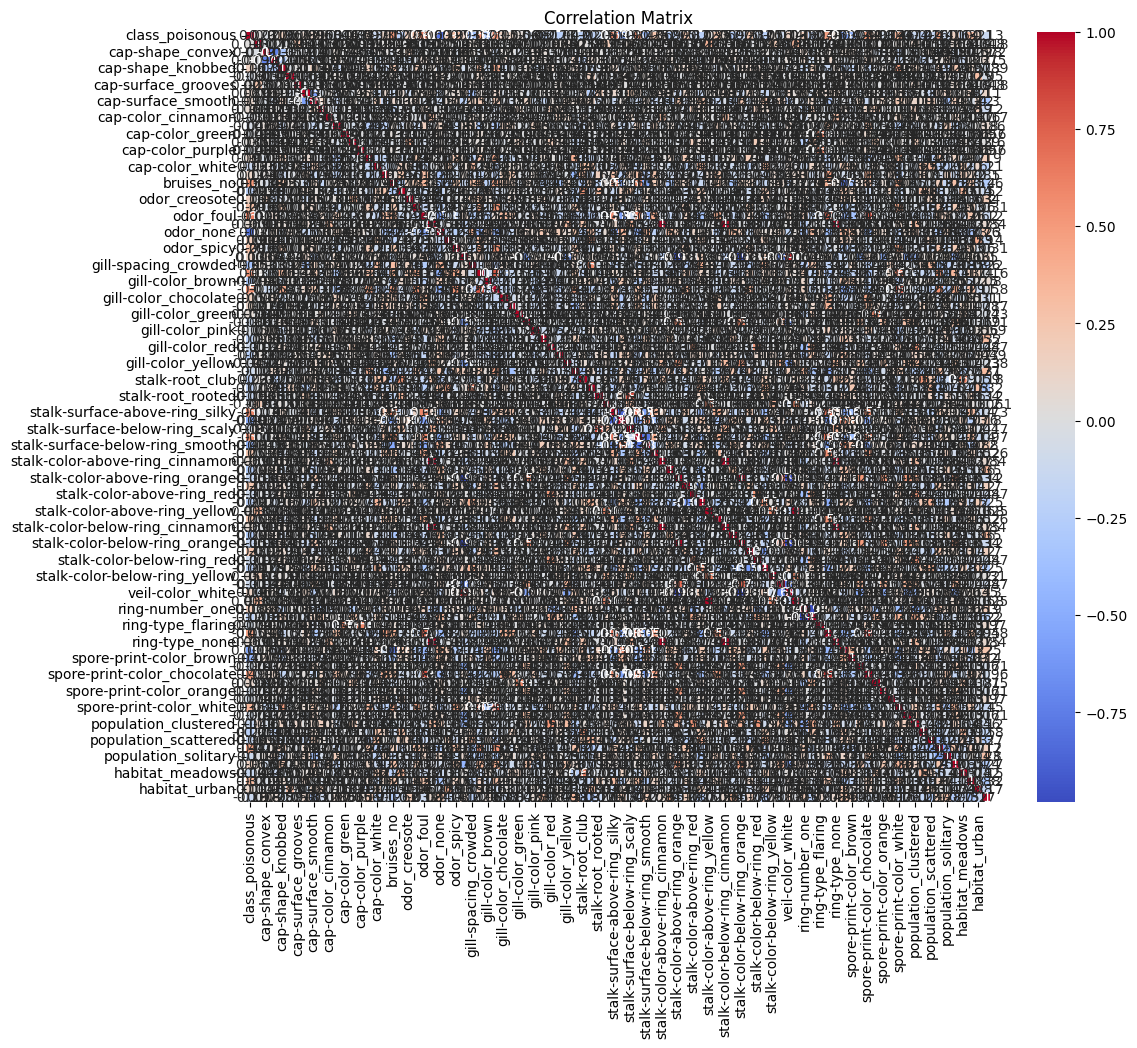

In [8]:
# Convert categorical variables to dummy/indicator variables
df_numeric = pd.get_dummies(df, drop_first=True)

# Compute the correlation matrix
plt.figure(figsize=(12, 10))
corr_matrix = df_numeric.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

This plot shows the distribution of mushroom populations across different habitats. On the x-axis, we have various population levels, such as 'several', 'solitary', 'scattered', 'numerous', 'abundant', and 'clustered', while the y-axis represents the count of mushrooms. Each color in the bars corresponds to a different habitat, including 'woods', 'grasses', 'urban', 'meadows', 'paths', and 'leaves'.
From this plot, we can observe that mushrooms are most populous in the 'woods' habitat, especially in categories like 'several' and 'solitary', indicating that woods may provide ideal conditions for mushrooms to grow both in groups and individually. On the other hand, habitats like urban areas show significantly fewer mushrooms, suggesting that these environments are less suitable for mushroom growth.
These findings are valuable as they highlight the importance of habitat in mushroom distribution and abundance.the plot emphasizes that natural habitats like woods support more diverse and abundant mushroom populations compared to more developed or disturbed areas


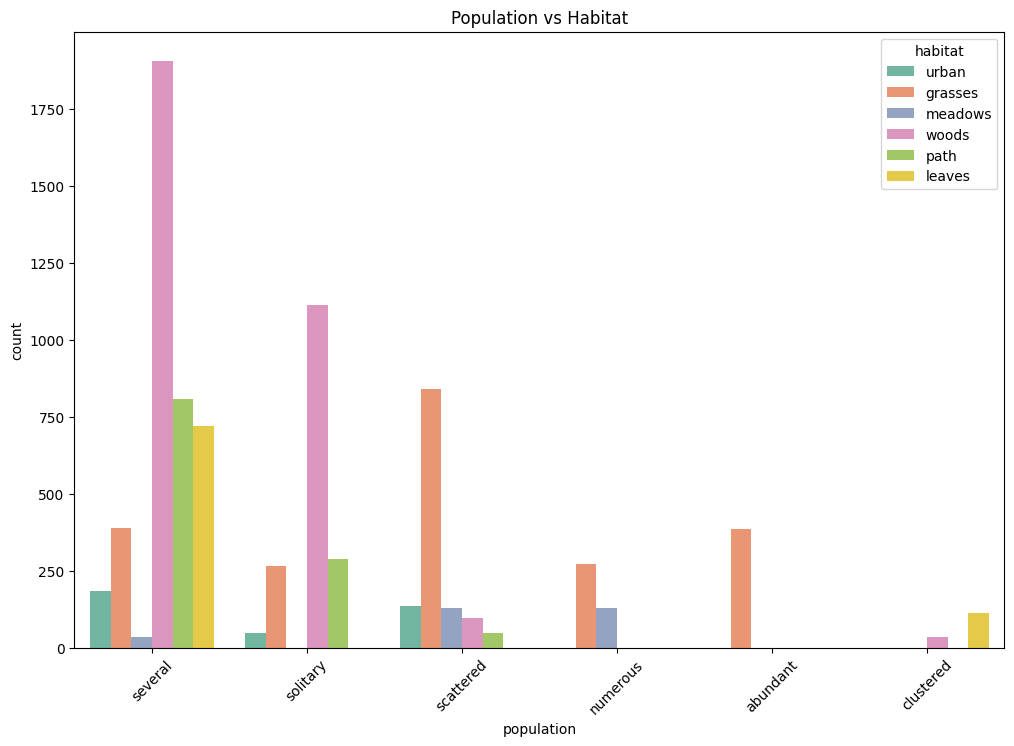

In [9]:
# Analyze interaction between population and habitat
plt.figure(figsize=(12, 8))
sns.countplot(x='population', hue='habitat', data=df, palette='Set2', order=df['population'].value_counts().index)
plt.title('Population vs Habitat')
plt.xticks(rotation=45)
plt.show()


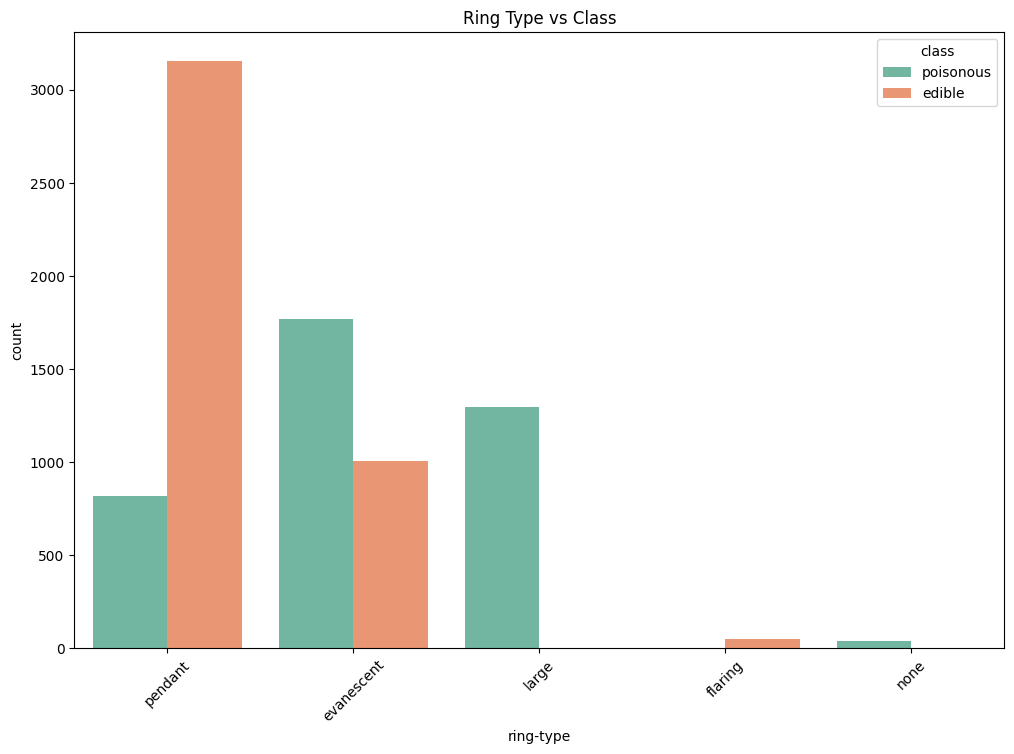

In [10]:
# Additional categorical analysis
plt.figure(figsize=(12, 8))
sns.countplot(x='ring-type', hue='class', data=df, palette='Set2', order=df['ring-type'].value_counts().index)
plt.title('Ring Type vs Class')
plt.xticks(rotation=45)
plt.show()

In [11]:
import pandas as pd
from pycaret.classification import *

The target variable for this task is 'class', which is a binary classification representing 'edible' and 'poisonous' mushrooms. Specifically, categorical features were automatically encoded, missing values were imputed using simple strategies, and numeric features were normalized using z-score standardization. Feature selection was enabled to reduce dimensionality and focus on the most relevant features, using LightGBM as the estimator. Additionally, multicollinearity was addressed by removing highly correlated features above a threshold of 0.9. 


In [12]:
# Initialize the classification setup
clf = setup(data=df, 
            target='class', 
            session_id=123, 
            normalize=True, 
            preprocess=True, 
            feature_selection=True, 
            remove_multicollinearity=True,
            log_experiment=True,
            experiment_name='mushroom_classification')

,Description,Value
0,Session id,123
1,Target,class
2,Target type,Binary
3,Target mapping,"edible: 0, poisonous: 1"
4,Original data shape,"(8124, 23)"
5,Transformed data shape,"(8124, 5)"
6,Transformed train set shape,"(5686, 5)"
7,Transformed test set shape,"(2438, 5)"
8,Ordinal features,5
9,Categorical features,22


2024/08/24 13:26:17 INFO mlflow.tracking.fluent: Experiment with name 'mushroom_classification' does not exist. Creating a new experiment.


The table above displays the results of comparing several machine learning models using different evaluation metrics.  According to the results, multiple models, including Decision Tree Classifier, Random Forest Classifier, Gradient Boosting Classifier, Extra Trees Classifier, XGBoost, Light Gradient Boosting Machine, and CatBoost Classifier, show similar high performance across various metrics. Specifically, these models have high accuracy (around 79.6%), AUC (0.8434), and F1 scores (0.7962). These models also perform well on other metrics such as Recall, Precision, and Kappa, indicating their reliability for the classification task.

In [13]:
# Compare models and select the best model
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.7986,0.8434,0.7986,0.8170,0.7962,0.5994,0.6160,0.9830
rf,Random Forest Classifier,0.7986,0.8434,0.7986,0.8170,0.7962,0.5994,0.6160,1.3090
gbc,Gradient Boosting Classifier,0.7986,0.8434,0.7986,0.8170,0.7962,0.5994,0.6160,1.4760
et,Extra Trees Classifier,0.7986,0.8434,0.7986,0.8170,0.7962,0.5994,0.6160,0.7600
xgboost,Extreme Gradient Boosting,0.7986,0.8434,0.7986,0.8170,0.7962,0.5994,0.6160,1.0150
lightgbm,Light Gradient Boosting Machine,0.7986,0.8436,0.7986,0.8170,0.7962,0.5994,0.6160,1.0810
catboost,CatBoost Classifier,0.7986,0.8434,0.7986,0.8170,0.7962,0.5994,0.6160,4.8030
knn,K Neighbors Classifier,0.7891,0.8321,0.7891,0.7976,0.7878,0.5793,0.5869,1.4170
ridge,Ridge Classifier,0.7856,0.0000,0.7856,0.7949,0.7842,0.5730,0.5810,0.9570
lda,Linear Discriminant Analysis,0.7856,0.8099,0.7856,0.7949,0.7842,0.5730,0.5810,0.7920


The model selected for tuning was the Decision Tree Classifier. Decision Trees are a popular choice for classification tasks due to their simplicity, interpretability, and ability to handle both numerical and categorical data. The initial comparison across multiple models indicated that the Decision Tree Classifier performed well with relatively high accuracy, AUC, and F1 scores.
During the tuning process, various hyperparameters of the Decision Tree Classifier were adjusted to optimize its performance. Key hyperparameters include criterion, which determines the function to measure the quality of a split, and max_depth, which controls the maximum depth of the tree. The tuning aimed to find the best combination of these and other hyperparameters, such as min_samples_split and min_samples_leaf, to enhance the model’s ability to generalize to unseen data while avoiding overfitting.
The tuning results, based on 10-fold cross-validation, showed consistent performance across different folds, with a mean accuracy of 79.6%, AUC of 0.8459, and F1 score of 0.7962. These metrics suggest that the tuned Decision Tree model is well-suited for the mushroom classification task, providing a balance between model complexity and predictive power. The optimized Decision Tree Classifier is now ready for deployment, offering a reliable method for determining whether a mushroom is edible or poisonous based on its features.



In [14]:
# Tune the best model
tuned_model = tune_model(best_model)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,13:31:27
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8559,0.8916,0.8559,0.8565,0.8557,0.7109,0.7117
1,0.7944,0.8110,0.7944,0.8017,0.7939,0.5904,0.5966
2,0.7645,0.8450,0.7645,0.7893,0.7610,0.5332,0.5552
3,0.7680,0.8408,0.7680,0.7686,0.7675,0.5343,0.5354
4,0.9192,0.9436,0.9192,0.9203,0.9192,0.8384,0.8394
5,0.8453,0.9235,0.8453,0.8700,0.8435,0.6929,0.7159
6,0.7729,0.8561,0.7729,0.8242,0.7656,0.5514,0.5977
7,0.7799,0.8049,0.7799,0.8303,0.7731,0.5652,0.6108
8,0.7165,0.7385,0.7165,0.7291,0.7143,0.4367,0.4470


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


The ROC (Receiver Operating Characteristic) curve for the tuned Decision Tree Classifier displays the model's ability to distinguish between the two classes (edible vs. poisonous). The ROC curve plots the True Positive Rate (Sensitivity) against the False Positive Rate (1 - Specificity) for different threshold values. An AUC (Area Under the Curve) value of 0.78 indicates a fair ability of the model to discriminate between the two classes, with values closer to 1.0 representing a perfect model. The AUC scores for class 0 (edible) and class 1 (poisonous) are both 0.78, suggesting that the model performs similarly well for both classes. Additionally, the micro-average AUC is 0.80, indicating overall performance across all classes. This metric is useful for understanding the model's general discriminative power and confirming its robustness for this classification task.

The confusion matrix for the tuned Decision Tree Classifier provides a detailed breakdown of the model's classification performance. It shows the number of true positives, true negatives, false positives, and false negatives. For class 0 (edible), the model correctly predicted 884 instances as edible, but mistakenly classified 379 edible mushrooms as poisonous (false positives). For class 1 (poisonous), the model correctly identified 987 poisonous mushrooms and incorrectly labeled 188 as edible (false negatives). This confusion matrix reveals that while the model generally performs well, there is room for improvement in minimizing false positives and false negatives, especially since both classes are crucial for safety and accuracy in identifying edible and poisonous mushrooms.

The pipeline plot provides a visual overview of the entire preprocessing and modeling workflow for the Decision Tree Classifier, detailing each step from data transformation to model evaluation. This visualization helps ensure transparency and reproducibility of the model-building process. Using the `evaluate_model()` function, further evaluation plots and metrics can be generated to assess model performance comprehensively. These evaluations are essential for understanding how well the model is likely to perform on unseen data and for identifying any areas where further tuning or adjustments may be needed.


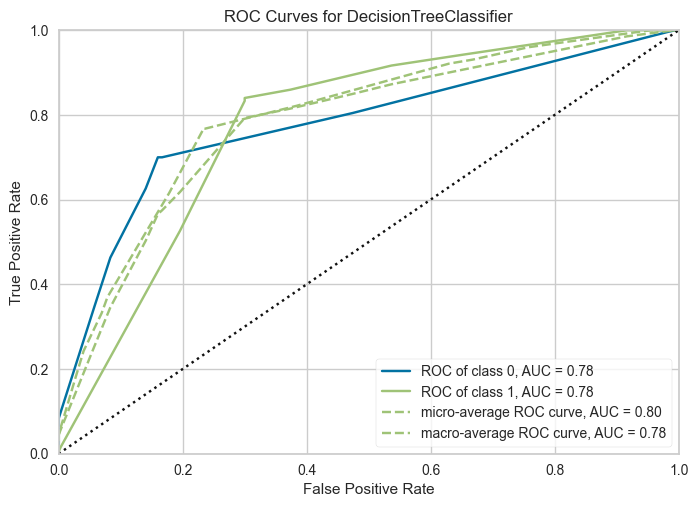

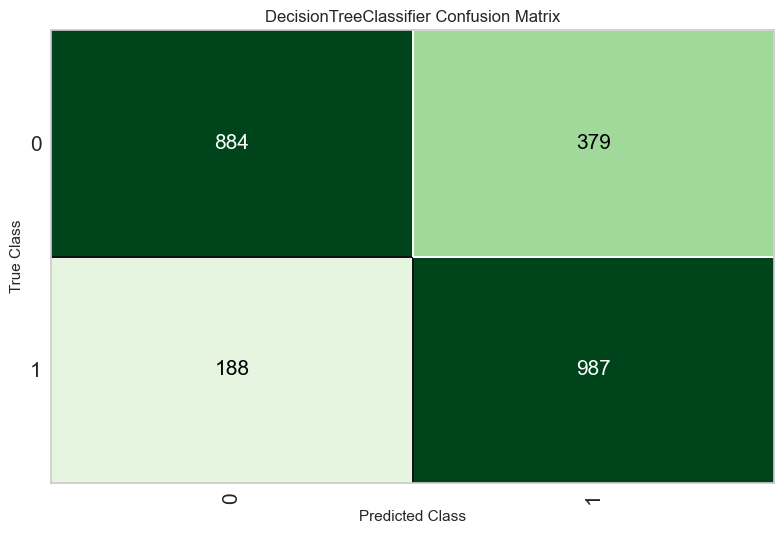

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [15]:
# Plot model evaluation metrics
plot_model(tuned_model, plot='auc')
plot_model(tuned_model, plot='confusion_matrix')
evaluate_model(tuned_model)

In [16]:
# Finalize the model
final_model = finalize_model(tuned_model)

In [17]:
# Save the model and pipeline
save_model(final_model, 'mushroom_classification_model')


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None, include=[],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean',
                                                               verbo...
                                     transformer=CleanColumnNames(match='[\\]\\[\\,\\{\\}\\"\\:]+'))),
  

In [18]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.


In [20]:
print(best_model)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=123, splitter='best')
